## Supervised learning potpourri

## Housing Prices

Housing Data:https://www.kaggle.com/anthonypino/melbourne-housing-market/data

Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [215]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from pandas import get_dummies
from pandas import concat

In [169]:
#import data frame and view head
df = pd.read_csv('Melbourne_housing_FULL.csv') ## Random Forest Regression 

## DATA CLEANING

In [170]:
display(df.head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [171]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [172]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [159]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [160]:
df = df.dropna()

In [161]:
display(df.head())

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [162]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


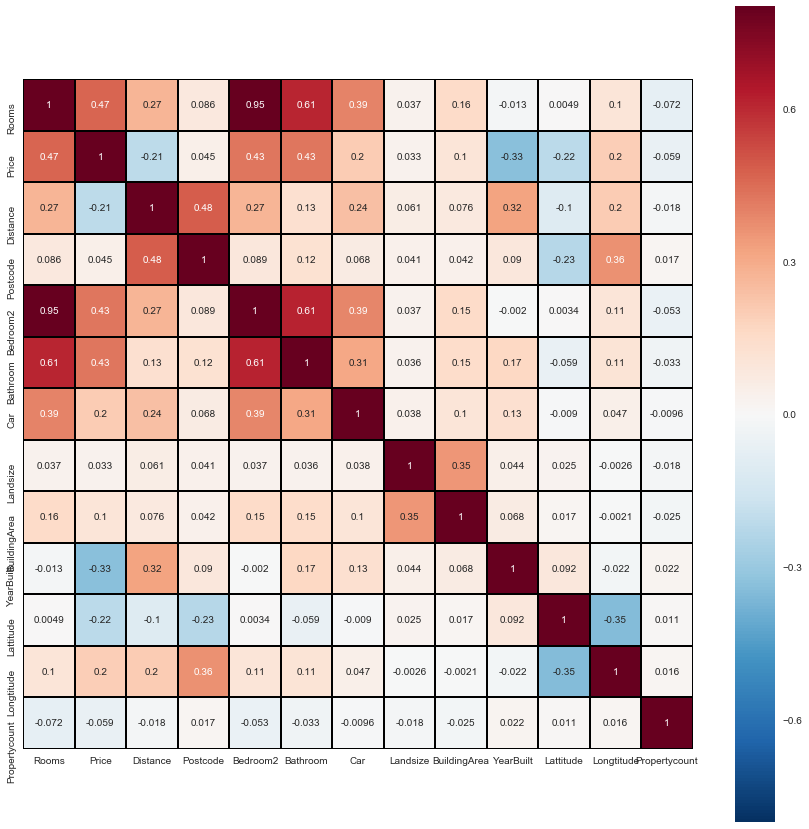

In [174]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),vmax=.8, square=True, linecolor='black', linewidths=1, annot=True)
plt.show()

From the correlation matrix,    
We see that __Rooms__, __Bedroom2__, __Bathroom__, __Car__, __BuildingArea__ and __Longitude__ have a good correlation with Price.    
We will aso look at __Lattitude__, __Landsize__ and __YearBuilt__ because of their negative correlation to the outcome.      

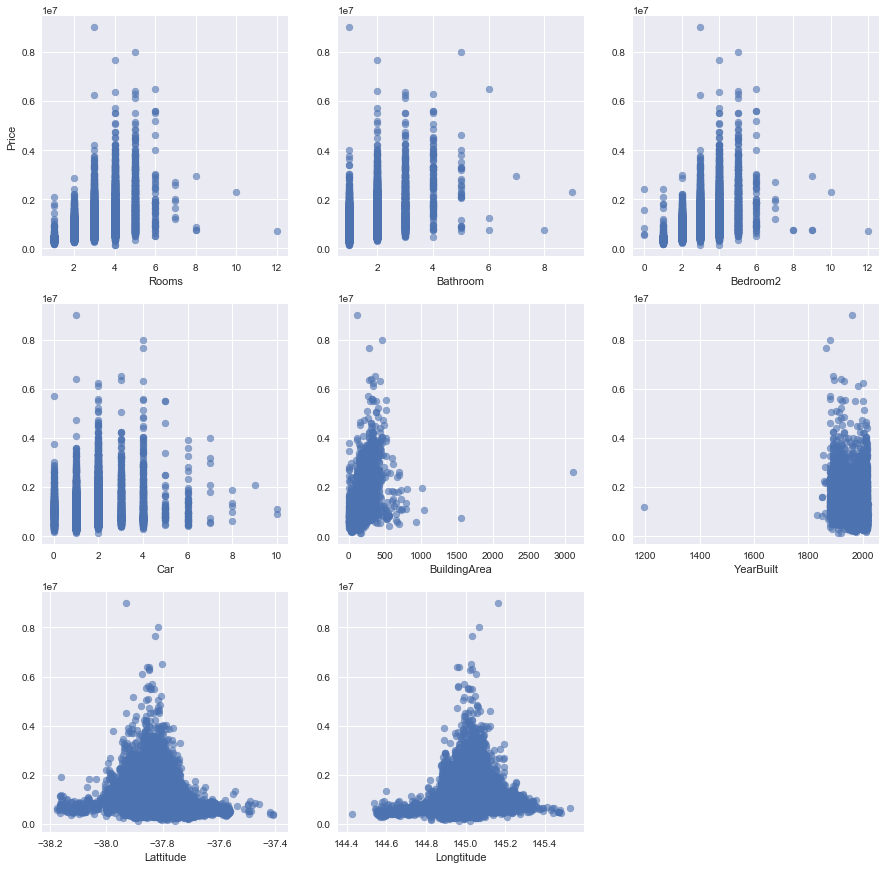

In [70]:
# Look at the scatter plot for Price and important features


plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.scatter(df['Rooms'], df['Price'], alpha=0.6)
plt.xlabel('Rooms')
plt.ylabel('Price')

plt.subplot(3, 3, 2)

plt.scatter(df['Bathroom'], df['Price'], alpha=0.6)
plt.xlabel('Bathroom')

plt.subplot(3, 3, 3)


plt.scatter(df['Bedroom2'], df['Price'], alpha=0.6)
plt.xlabel('Bedroom2')

plt.subplot(3, 3, 4)
plt.scatter(df['Car'], df['Price'], alpha=0.6)
plt.xlabel('Car')

plt.subplot(3, 3, 5)
plt.scatter(df['BuildingArea'], df['Price'], alpha=0.6)
plt.xlabel('BuildingArea')

plt.subplot(3, 3, 6)
plt.scatter(df['YearBuilt'], df['Price'], alpha=0.6)
plt.xlabel('YearBuilt')

plt.subplot(3, 3, 7)
plt.scatter(df['Lattitude'], df['Price'], alpha=0.6)
plt.xlabel('Lattitude')

plt.subplot(3, 3, 8)
plt.scatter(df['Longtitude'], df['Price'], alpha=0.6)
plt.xlabel('Longtitude')



plt.show()

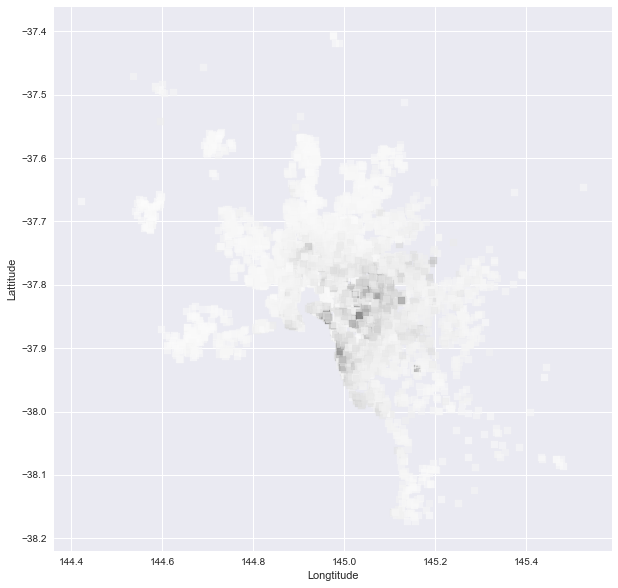

In [167]:
plt.figure(figsize=(10, 10))
plt.scatter(df['Longtitude'], df['Lattitude'], alpha=0.6, c=df['Price'], marker = ",")
plt.xlabel('Longtitude')
plt.ylabel('Lattitude')
plt.show()

This shows that we might need to leave Longtitude and Lattitude out of the model.   
We see that there are some lower price Houses around High Priced Houses.     

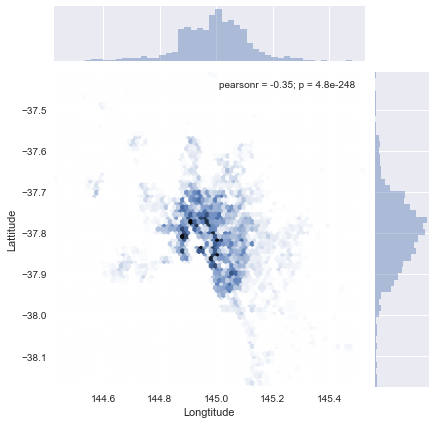

In [84]:
g = sns.jointplot("Longtitude", "Lattitude", data=df, kind="hex")

In [168]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Year_sold'],
      dtype='object')

In [381]:
df_f = df[['Rooms','Price','Date', 'Distance', 
       'Price','Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea','YearBuilt']]

###  Make Categorical variables 
df_cat = df[["Method", "Regionname","Type","CouncilArea"]]
df_cat = get_dummies(df_cat)

In [382]:
# Add Categorical Variables to df_f
df_f = concat([df_f,df_cat],1)
df_f.head()

,Rooms,Price,Date,Distance,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,NaN,3/09/2016,2.5,NaN,2.0,1.0,1.0,126.0,NaN,...,0,0,0,0,0,0,0,0,1,0
1,2,1480000.0,3/12/2016,2.5,1480000.0,2.0,1.0,1.0,202.0,NaN,...,0,0,0,0,0,0,0,0,1,0
2,2,1035000.0,4/02/2016,2.5,1035000.0,2.0,1.0,0.0,156.0,79.0,...,0,0,0,0,0,0,0,0,1,0
3,3,NaN,4/02/2016,2.5,NaN,3.0,2.0,1.0,0.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,3,1465000.0,4/03/2017,2.5,1465000.0,3.0,2.0,0.0,134.0,150.0,...,0,0,0,0,0,0,0,0,1,0


In [383]:
 #remove NAN# 
df_f = df_f.dropna()

#df_f = df_f[df_f.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [384]:

# create age at sale variable
df_f['Year_sold'] = df['Date'].str[-4:]
df_f['Year_sold'] = pd.to_numeric(df_f.Year_sold, errors='coerce')
df_f['YearBuilt'] = pd.to_numeric(df_f.YearBuilt, errors='coerce')

## NEW Feature AGE of HOUSE
df_f['Age'] = df_f['Year_sold'] - df_f['YearBuilt']


### Make A New Feature Price/BuildingArea
df_f['Price_PerArea'] = df['Price']/df['BuildingArea']

#remove NAN and INF # 
df_f = df_f[df_f.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]


df_f.dtypes

Rooms                                           int64
Price                                         float64
Date                                           object
Distance                                      float64
Price                                         float64
Bedroom2                                      float64
Bathroom                                      float64
Car                                           float64
Landsize                                      float64
BuildingArea                                  float64
YearBuilt                                     float64
Method_PI                                       uint8
Method_PN                                       uint8
Method_S                                        uint8
Method_SA                                       uint8
Method_SN                                       uint8
Method_SP                                       uint8
Method_SS                                       uint8
Method_VB                   

In [385]:
df_f.head()

,Rooms,Price,Date,Distance,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,...,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Year_sold,Age,Price_PerArea
2,2,1035000.0,4/02/2016,2.5,1035000.0,2.0,1.0,0.0,156.0,79.0,...,0,0,0,0,0,1,0,2016,116.0,13101.265823
4,3,1465000.0,4/03/2017,2.5,1465000.0,3.0,2.0,0.0,134.0,150.0,...,0,0,0,0,0,1,0,2017,117.0,9766.666667
6,4,1600000.0,4/06/2016,2.5,1600000.0,3.0,1.0,2.0,120.0,142.0,...,0,0,0,0,0,1,0,2016,2.0,11267.605634
11,3,1876000.0,7/05/2016,2.5,1876000.0,4.0,2.0,0.0,245.0,210.0,...,0,0,0,0,0,1,0,2016,106.0,8933.333333
14,2,1636000.0,8/10/2016,2.5,1636000.0,2.0,1.0,2.0,256.0,107.0,...,0,0,0,0,0,1,0,2016,126.0,15289.719626


In [386]:
df_f.describe()

,Rooms,Price,Distance,Price,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Year_sold,Age,Price_PerArea
count,8850.000000,8.850000e+03,8850.000000,8.850000e+03,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,...,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8850.000000,8.850000e+03
mean,3.096723,1.092175e+06,11.189684,1.092175e+06,3.075932,1.645989,1.692203,522.890282,150.054839,1965.716158,...,0.037175,0.031525,0.014124,0.027006,0.018870,0.036497,0.002260,2016.722147,51.005989,9.842717e+03
std,0.963875,6.789343e+05,6.812718,6.789343e+05,0.966320,0.722081,0.976591,1062.211928,87.472988,37.071556,...,0.189201,0.174743,0.118010,0.162109,0.136074,0.187534,0.047487,0.657524,37.003802,5.002364e+04
min,1.000000,1.310000e+05,0.000000,1.310000e+05,0.000000,1.000000,0.000000,0.000000,1.000000,1196.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,-2.000000,4.746957e+02
25%,2.000000,6.410000e+05,6.400000,6.410000e+05,2.000000,1.000000,1.000000,211.000000,100.000000,1945.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,17.000000,5.359206e+03
50%,3.000000,9.000000e+05,10.200000,9.000000e+05,3.000000,2.000000,2.000000,476.500000,132.000000,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,47.000000,7.211578e+03
75%,4.000000,1.345000e+06,13.900000,1.345000e+06,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,71.000000,9.349002e+03
max,12.000000,9.000000e+06,47.400000,9.000000e+06,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,821.000000,3.812000e+06


In [402]:
X =  df_f.loc[:, ~(df_f.columns).isin(['Date','Price','BuildingArea','Price_PerArea'])]
Y = df_f['Price_PerArea']

In [404]:
df_f.columns

Index(['Rooms', 'Price', 'Date', 'Distance', 'Price', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Method_PI',
       'Method_PN', 'Method_S', 'Method_SA', 'Method_SN', 'Method_SP',
       'Method_SS', 'Method_VB', 'Method_W', 'Regionname_Eastern Metropolitan',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Type_h', 'Type_t', 'Type_u',
       'CouncilArea_Banyule City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Gr

In [405]:
X.columns

Index(['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'YearBuilt', 'Method_PI', 'Method_PN', 'Method_S', 'Method_SA',
       'Method_SN', 'Method_SP', 'Method_SS', 'Method_VB', 'Method_W',
       'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Type_h', 'Type_t', 'Type_u',
       'CouncilArea_Banyule City Council', 'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'Cou

In [406]:
Y.describe()

count    8.850000e+03
mean     9.842717e+03
std      5.002364e+04
min      4.746957e+02
25%      5.359206e+03
50%      7.211578e+03
75%      9.349002e+03
max      3.812000e+06
Name: Price_PerArea, dtype: float64

## Random Forest  Regression

In [407]:
# Run the Random Forest classifier.# Run th 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

# Set the start time for execution speed.
import time
start_time = time.clock() 

rfr = ensemble.RandomForestRegressor(max_depth=5,max_features='auto', n_estimators=50)



rfr.fit(X, Y)

print('Runtime: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('Testing on  Training Set: ' + str(rfr.score(X, Y)))

cv = cross_val_score(rfr, X, Y, cv=10)
print('Scores:', cv)


print('\nAverage score:', cv.mean())

Runtime: 1.0437440000000038 seconds
Testing on  Training Set: 0.612642724041
Scores: [ -4.89387642e-01  -2.29524838e-01  -3.96896979e-01  -1.09069062e-01
  -9.72840501e-01  -3.31292891e+01  -2.60142590e-03  -4.70243449e+01
  -8.20868384e+00  -2.51713694e+01]

Average score: -11.5734007716


Cross validation is performing very poorly...    
To improve on it, we can look at the features with the most importance and use them for __X__  
For instance we can pick the 30 most important features and see if we get a better cross validation result.   

In [409]:
df_features = pd.DataFrame(rfr.feature_importances_)
df_features['features']= X.columns

df_features.sort_values(0,ascending = False)

,0,features
1,2.806958e-01,Distance
5,1.839558e-01,Landsize
61,1.582463e-01,Age
9,1.196483e-01,Method_S
6,7.864690e-02,YearBuilt
14,2.667351e-02,Method_VB
29,2.574525e-02,CouncilArea_Boroondara City Council
3,2.568162e-02,Bathroom
4,1.397440e-02,Car
25,1.373839e-02,Type_t


In [393]:
#print(rfr.predict([[5, 2, 2, 2, , , 2000, , ]])) ===> Pick Randomly from Histogram 

In [410]:
target = Y
data = X
y_pred = rfr.predict(data)
score = rfr.score(data, target) 
cross_val = cross_val_score(rfr, data, target, cv=5)

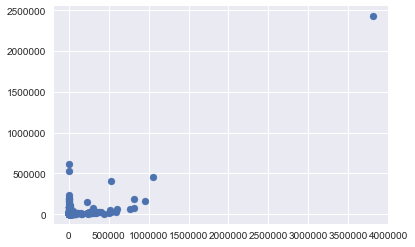

In [413]:
plt.scatter(target,y_pred)
plt.show()